In [69]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz
import numpy as np

In [88]:
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [89]:
type(wine)

sklearn.utils._bunch.Bunch

In [90]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,random_state=0,test_size=0.3)

In [106]:
clf = tree.DecisionTreeClassifier(criterion="gini")

In [107]:
clf.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [108]:
result = clf.score(Xtest,Ytest)

In [109]:
print(result)

0.8703703703703703


In [95]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=wine.target_names
                                ,filled=True
                                ,)

In [96]:
graph = graphviz.Source(dot_data)

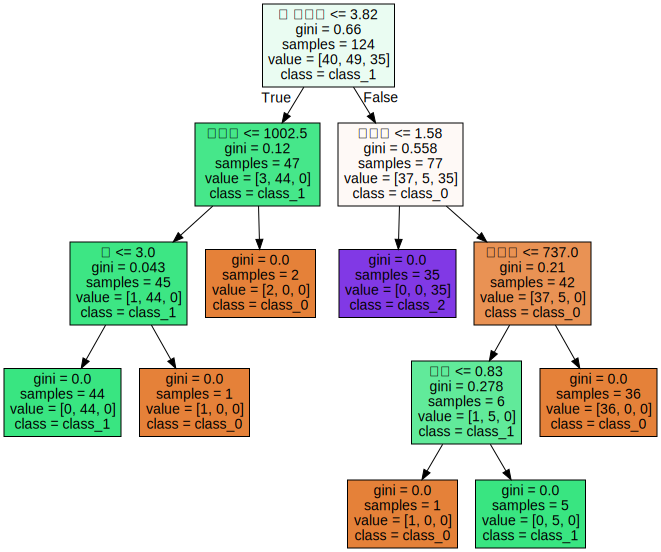

In [97]:
graph

In [79]:
clf.feature_importances_

array([0.        , 0.02036125, 0.02389053, 0.        , 0.        ,
       0.        , 0.4175378 , 0.        , 0.        , 0.40621672,
       0.        , 0.        , 0.1319937 ])

In [49]:
a = list(zip(feature_name,clf.feature_importances_))
a

[('酒精', 0.0),
 ('苹果酸', 0.03444315233032314),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4242187763407541),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.22428264928325142),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3170554220456714)]

In [60]:
#泰坦尼克号幸存者预测
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [113]:
rng = np.random.RandomState(1)

In [114]:
rng.rand(10)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [23]:
data = pd.read_csv("./data/data.csv",index_col= 0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#对数据集进行处理
#删除不需要的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [25]:
#填充缺失的数据
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [33]:
#将分类变量转换为数值型变量
data.dropna(inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [34]:
labels = data["Embarked"].unique().tolist()

In [35]:
labels

['S', 'C', 'Q']

In [36]:
# 将三分类变量转换为数值型变量
# 特征的各个值之间没有联系才可以按下列方法转换成数值
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))
data["Sex"] = (data["Sex"] == "male").astype("int")

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [38]:
#提取标签和特征矩阵，分测试集和训练集
x = data.iloc[:,data.columns!="Survived"]
y = data.iloc[:,data.columns=='Survived']

In [54]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,random_state=0,test_size=0.3)

In [57]:
for i in [Xtrain,Ytrain,Xtest,Ytest]:
    i.index = range(i.shape[0])

In [65]:
#导入模型，测试一下
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
print(clf.score(Xtrain,Ytrain))

0.9855305466237942


In [66]:
#画出决策树
dot_data = tree.export_graphviz(clf,feature_names=x.columns)
graph = graphviz.Source(dot_data)

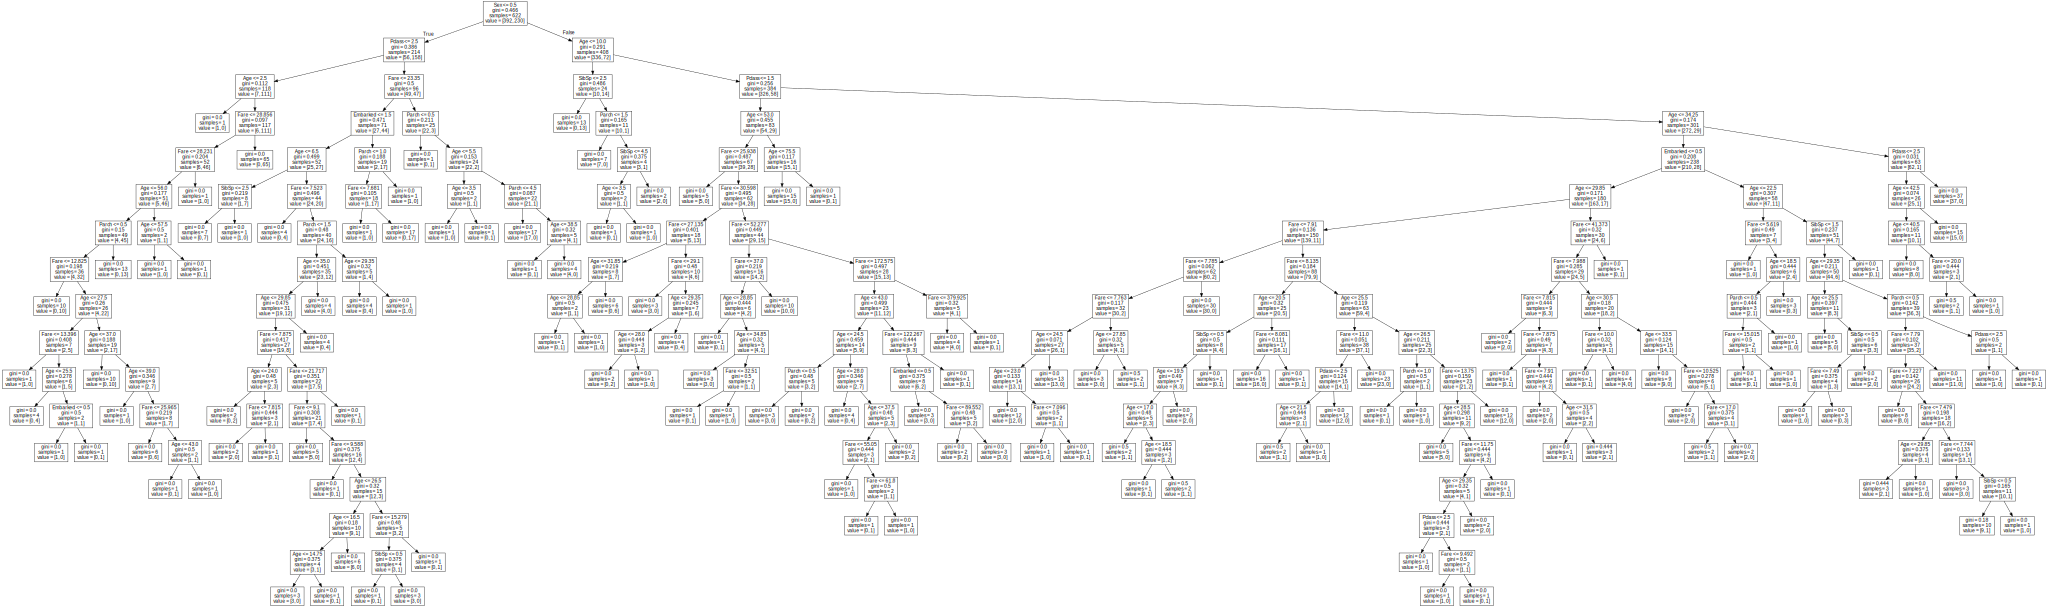

In [67]:
graph

In [62]:
#交叉验证
score = cross_val_score(clf,x,y,cv=10)
type(score)

numpy.ndarray

In [64]:
print(score.mean())

0.7761874361593463


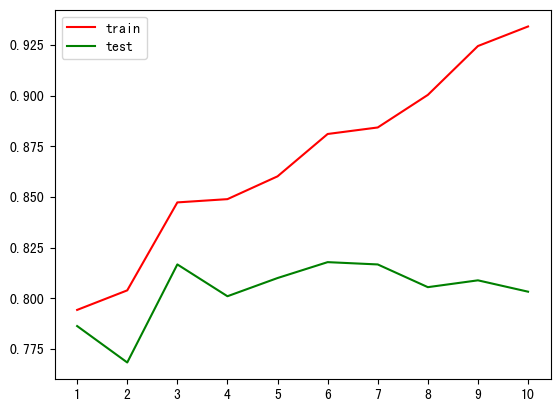

In [68]:
#不同max_depth下观察模型的拟合情况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0
                                 ,max_depth=i+1
                                 ,criterion="entropy")
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="green",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [73]:
#网格搜索调整参数
gini_threhold = np.linspace(0,0.5,20)
p = {
    "criterion":["gini","entropy"]
    ,"splitter":["random","best"]
    ,"max_depth":[*range(1,11)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*gini_threhold]
}
clf = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(clf,p,cv=10)
gs = gs.fit(Xtrain,Ytrain)

In [74]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [75]:
gs.best_score_

0.8455709165386585